In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
dataFrame = pd.read_csv(r"Sales.csv", encoding="unicode_escape")


In [33]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Data Cleaning 

In [ ]:
# Removing Null columns which has no data
dataFrame.drop(["Status","unnamed1"], axis=1 , inplace=True)

In [53]:
pd.isnull(dataFrame).sum() #Amount column has 12 entry as NOn. filling it with 0


User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [59]:
dataFrame['Amount'] = dataFrame['Amount'].fillna(0)
pd.isnull(dataFrame).sum() 

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [63]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11251 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [69]:
#Checking min and max of the age and orders and amount just for reference 
dataFrame[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9443.527902
std,12.754122,1.115047,5228.684037
min,12.000000,1.000000,0.000000
25%,27.000000,1.500000,5440.000000
50%,33.000000,2.000000,8108.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


 # Exploratary  Data Analyst (EAT)

In [73]:
dataFrame.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

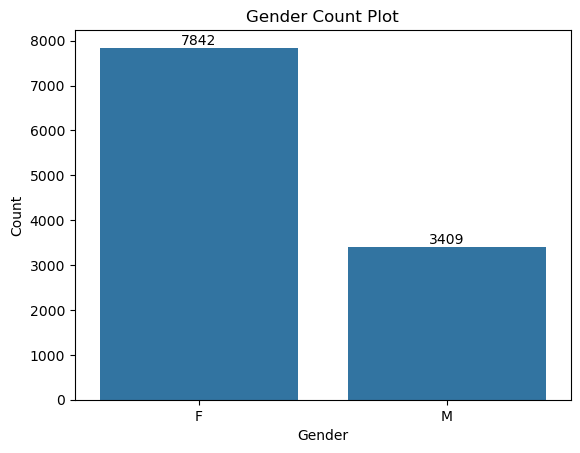

In [103]:
# Count the Gender using plot

genderCount= sns.countplot(x="Gender", data=dataFrame )
plt.title("Gender Count Plot")
genderCount.set_xlabel("Gender")

genderCount.set_ylabel("Count")
genderCount.bar_label(genderCount.containers[0])
plt.show()

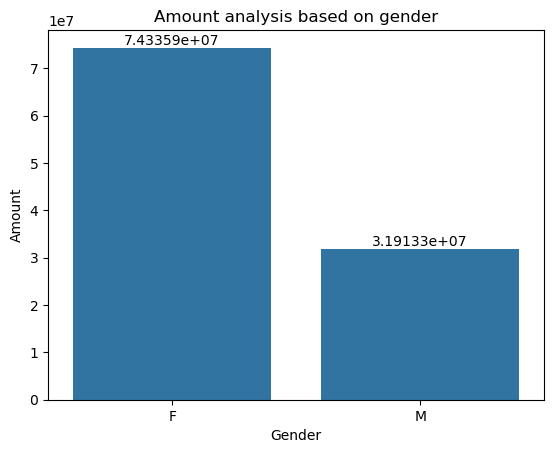

In [137]:
genderOrderAmount= dataFrame.groupby("Gender", as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
genderOrderAmountplot=sns.barplot(x="Gender" , y="Amount", data=genderOrderAmount)
plt.title("Amount analysis based on gender")
genderOrderAmountplot.bar_label(genderOrderAmountplot.containers[0])
plt.show()


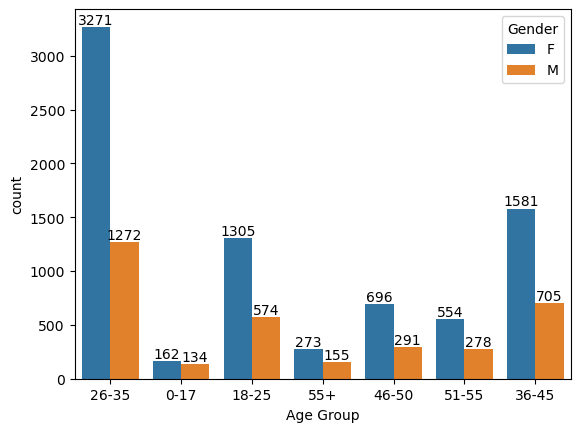

In [199]:
ageCount =sns.countplot(data=dataFrame, x="Age Group" , hue="Gender")
for container in ageCount.containers:
    ageCount.bar_label(container, rotation=0)
plt.show()


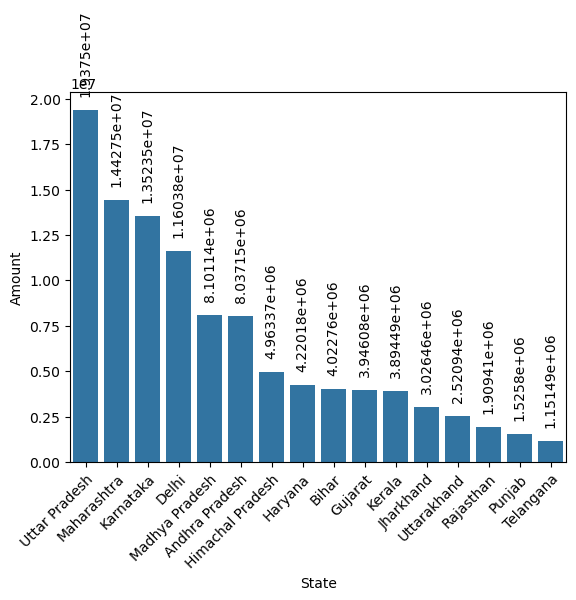

In [253]:
salesAmountbyState=dataFrame.groupby("State", as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
salesAmountbyStatePlot= sns.barplot(x="State", y="Amount", data=salesAmountbyState )
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
salesAmountbyStatePlot.bar_label(salesAmountbyStatePlot.containers[0], rotation=90 , padding=10)
plt.show()

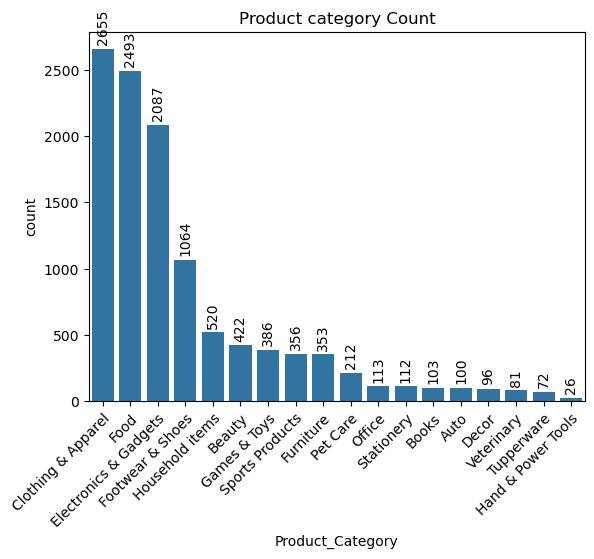

In [279]:
category_counts = dataFrame['Product_Category'].value_counts().index
CategoryCount = sns.countplot(data=dataFrame, x="Product_Category", order=category_counts) 
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title("Product category Count")
CategoryCount.bar_label(CategoryCount.containers[0],rotation=90, padding=3)
plt.show()

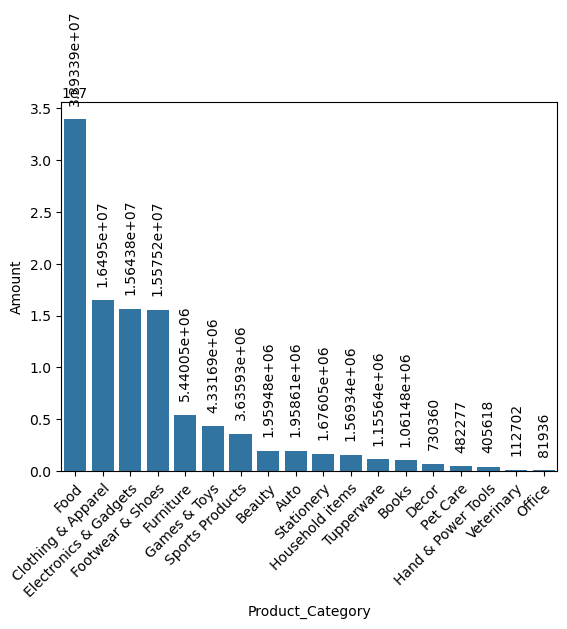

In [281]:
salesAmountbyproduct=dataFrame.groupby("Product_Category", as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
salesAmountbyproductPlot= sns.barplot(x="Product_Category", y="Amount", data=salesAmountbyproduct )
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
salesAmountbyproductPlot.bar_label(salesAmountbyproductPlot.containers[0], rotation=90 , padding=10)
plt.show()

#Conclusion:

Based on the above analysis of the sales data:

The majority of sales were made by women.
The age group of 26-35 (both male and female) contributes the most to sales.
Uttar Pradesh generates the highest sales amount.
Although the maximum number of orders is for the Clothing category, the highest sales amount comes from the Food category.